In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
import os
from os.path import normpath
from pathlib import PureWindowsPath
import numpy as np


def convert(path):
    return PureWindowsPath(normpath(PureWindowsPath(path).as_posix())).as_posix()


chemin_du_fichier = convert(r"winogrande_1.1\train_m.jsonl")
df = pd.read_json(chemin_du_fichier , lines=True)
print(df.head())

l_option1 = list(df["option1"])
l_option2 = list(df["option2"])



def frequency1(l):
    counter = Counter(l)
    # Trie les mots par fréquence décroissante
    sorted_words = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    sorted_words = [[word, freq] for word, freq in sorted_words]
    for i in range(len(sorted_words)):
        sorted_words[i][1] /= 2

    return sorted_words

def frequency2(l):
    counter = Counter(l)
    # Trie les mots par fréquence décroissante
    sorted_words = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    sorted_words = [[word, freq] for word, freq in sorted_words]

    return sorted_words


words_and_occurences_sorted_option1 = frequency1(l_option1)
common_words_and_occurences_sorted_option1
words_and_occurences_sorted_option2 = frequency1(l_option2)

def common_words_only(l_sorted_occurences):
    for line in l_sorted_occurences:
        if line

                                qID  \
0  3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2   
1  3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1   
2  3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1   
3  3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2   
4  3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2   

                                            sentence option1 option2  answer  
0  Ian volunteered to eat Dennis's menudo after a...     Ian  Dennis       2  
1  Ian volunteered to eat Dennis's menudo after a...     Ian  Dennis       1  
2  He never comes to my home, but I always go to ...    home   house       1  
3  He never comes to my home, but I always go to ...    home   house       2  
4  Kyle doesn't wear leg warmers to bed, while Lo...    Kyle   Logan       2  


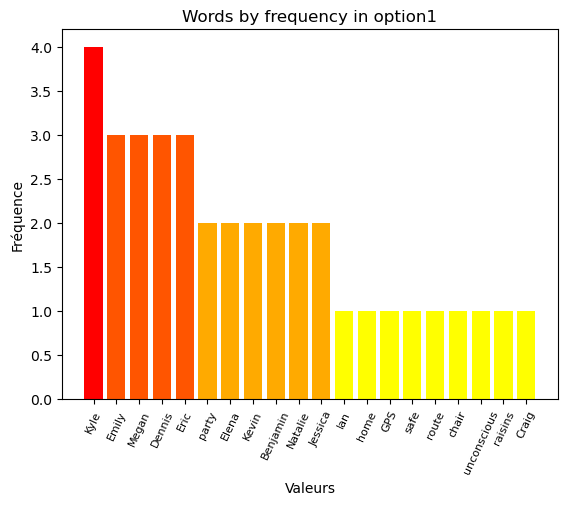

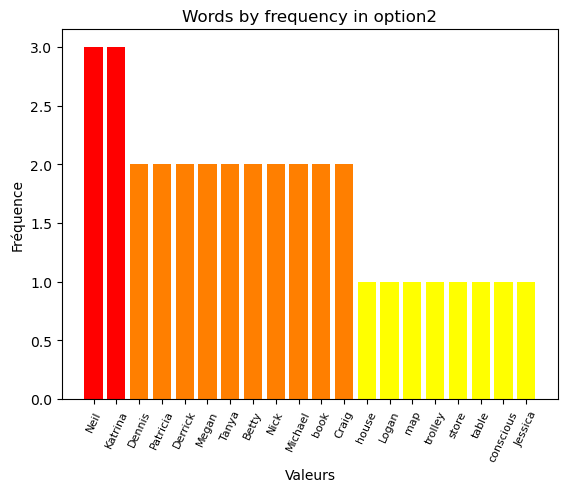

In [40]:
from matplotlib import colors

def frequency_plot(x,y,plot_name):
# Créer un colormap allant du rouge au bleu
    cmap = colors.LinearSegmentedColormap.from_list("red_to_blue", ["yellow", "red"])

# Normaliser les fréquences entre 0 et 1 pour les appliquer au colormap
    norm = plt.Normalize(min(y), max(y))

# Créer une figure et un axe
    fig, ax = plt.subplots()

# Dessiner l'histogramme avec un dégradé de couleur
    for i in range(len(x)):
        ax.bar(x[i], y[i], width=0.8, color=cmap(norm(y[i])), align='center')


# Titres et labels
    plt.title(plot_name)
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=65) 
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.show()


plot_name = "Words by frequency in option1"
x1 = [row[0] for row in words_and_occurences_sorted_option1]
y1 = [row[1] for row in words_and_occurences_sorted_option1]
frequency_plot(x1[:20],y1[:20],plot_name)

plot_name = "Words by frequency in option2"
x2 = [row[0] for row in words_and_occurences_sorted_option2]
y2 = [row[1] for row in words_and_occurences_sorted_option2]
frequency_plot(x2[:20],y2[:20],plot_name)



In [18]:
ratio1 = len(words_and_occurences_sorted_option1) / (len(l_option1) * 2)

print(ratio1)



0.196875


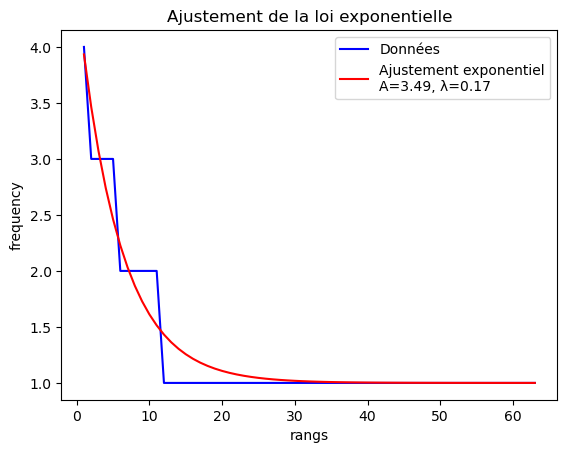

R² : 0.9338
Paramètre estimé A : 3.49
Paramètre estimé lambda : 0.17


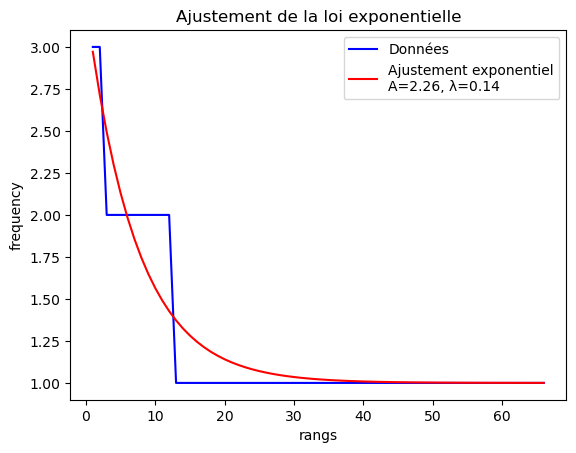

R² : 0.8678
Paramètre estimé A : 2.26
Paramètre estimé lambda : 0.14


In [22]:
from scipy.optimize import curve_fit


# Définir la fonction exponentielle pour l'ajustement
def exp_func(x, A, lambda_):
    return A * np.exp(-lambda_ * x) + 1

def exp_model_and_plot(x_values,y_values):
    # Ajuster la fonction exponentielle aux données
    rangs = np.arange(1, len(x_values) + 1)
    params, covariance = curve_fit(exp_func, rangs, y_values, p0=[1, 0.1])

# Extraire les paramètres ajustés A et lambda
    A_estime = 8
    A_estime, lambda_estime = params
    

# Générer les valeurs ajustées
    x_fit = np.linspace(min(rangs), max(rangs), len(x_values))
    y_fit = exp_func(x_fit, *params)

# Visualiser les données et l'ajustement
    plt.plot(rangs, y_values, label="Données", color="blue")
    plt.plot(x_fit, y_fit, label=f"Ajustement exponentiel\nA={A_estime:.2f}, λ={lambda_estime:.2f}", color="red")
    plt.xlabel('rangs')
    plt.ylabel('frequency')
    plt.legend()
    plt.title('Ajustement de la loi exponentielle')
    plt.show()
    
    residus = y_values - y_fit

# Somme totale des carrés (variance des valeurs réelles autour de leur moyenne)
    SS_tot = np.sum((y_values - np.mean(y_values))**2)

# Somme des carrés des résidus
    SS_res = np.sum(residus**2)

# Coefficient de détermination R²
    R_squared = 1 - (SS_res / SS_tot)

# Affichage du résultat
    print(f"R² : {R_squared:.4f}")
    print(f"Paramètre estimé A : {A_estime:.2f}")
    print(f"Paramètre estimé lambda : {lambda_estime:.2f}")

exp_model_and_plot(x1,y1)
exp_model_and_plot(x2,y2)

In [23]:
def similarity_percentage(sent1, sent2):
    nb_common_words = 0
    sent1 = sent1.split()
    sent2 = sent2.split()
    
    for word in sent1 :
        if word in sent2:
            nb_common_words +=1
    ratio = nb_common_words / max(len(sent1), len(sent2))
    return ratio

x="c'est la raison de"
y="c'est la raison de"
similarity_percentage(x,y)



1.0

     ---------------------------------------- 12.8/12.8 MB 7.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [87]:
import spacy
from tqdm import tqdm

def cross_frequency(df):
    nlp = spacy.load("en_core_web_sm")
    pairs = []
    for index, row in tqdm(df.iterrows(),total = len(df)):
        if row.values[4] == 1:
            option = 2
        else:
            option = 3

        if nlp(row.values[option])[0].pos_ == 'PROPN':
            for word in row.values[1].split():
                pairs += [('PROPN',word)]
        else:
            for word in row.values[1].split():
                pairs += [(row.values[option],word)]
    return frequency2(pairs)
    
# cross_frequency(df)


def link_with_adj(df):
    adj_pairs = []
    pairs = cross_frequency(df)
    nlp = spacy.load("en_core_web_sm")
    for pair in pairs:
        word_sentence = nlp(pair[0][1])
        if word_sentence[0].pos_ == "ADJ":
            adj_pairs += pair
            print(pair)
            
def link_with_verbs(df):
    adj_pairs = []
    pairs = cross_frequency(df)
    nlp = spacy.load("en_core_web_sm")
    for pair in pairs:
        word_sentence = nlp(pair[0][1])
        if word_sentence[0].pos_ == "VERB":
            adj_pairs += pair
            print(pair)

link_with_adj(df)


100%|██████████| 2558/2558 [00:16<00:00, 151.85it/s]


[('PROPN', 'had'), 290]
[('PROPN', 'wanted'), 89]
[('PROPN', 'did'), 80]
[('PROPN', "didn't"), 62]
[('PROPN', 'has'), 59]
[('PROPN', 'asked'), 58]
[('PROPN', 'bought'), 44]
[('PROPN', 'liked'), 42]
[('PROPN', 'made'), 41]
[('PROPN', 'needed'), 39]
[('PROPN', 'got'), 37]
[('PROPN', 'found'), 36]
[('PROPN', 'get'), 36]
[('PROPN', 'have'), 36]
[('PROPN', 'tried'), 36]
[('PROPN', 'used'), 35]
[('PROPN', 'go'), 32]
[('PROPN', 'help'), 32]
[('PROPN', 'thought'), 31]
[('PROPN', 'decided'), 31]
[('PROPN', 'put'), 30]
[('PROPN', 'went'), 29]
[('PROPN', 'told'), 29]
[('PROPN', 'loved'), 28]
[('PROPN', 'took'), 27]
[('PROPN', 'spent'), 24]
[('PROPN', 'work'), 23]
[('PROPN', 'likes'), 23]
[('PROPN', 'gave'), 22]
[('PROPN', "doesn't"), 22]
[('PROPN', 'felt'), 22]
[('PROPN', 'does'), 21]
[('PROPN', 'compared'), 21]
[('PROPN', 'make'), 20]
[('Logan', 'Logan'), 17]
[('PROPN', 'ate'), 17]
[('PROPN', 'knew'), 17]
[('PROPN', 'buy'), 16]
[('PROPN', 'playing'), 16]
[('PROPN', 'do'), 16]
[('PROPN', 'having'

[('PROPN', 'grilled'), 3]
[('PROPN', 'scheduled'), 3]
[('PROPN', 'retire'), 3]
[('PROPN', 'frying'), 3]
[('PROPN', 'lead'), 3]
[('PROPN', 'attended'), 3]
[('PROPN', 'cross'), 3]
[('Neil', 'looking'), 3]
[('PROPN', 'stand'), 3]
[('Ian', 'eating'), 2]
[('map', 'got'), 2]
[('GPS', 'got'), 2]
[('Megan', 'go'), 2]
[('Megan', 'wore'), 2]
[('Neil', 'asked'), 2]
[('Megan', 'loved'), 2]
[('Lindsey', 'loved'), 2]
[('Lindsey', 'liked'), 2]
[('PROPN', 'held,'), 2]
[('PROPN', 'forgotten.'), 2]
[('PROPN', 'Handling'), 2]
[('PROPN', 'remain'), 2]
[('Emily', 'asked'), 2]
[('PROPN', 'switched'), 2]
[('PROPN', 'coughing'), 2]
[('Rebecca', 'work'), 2]
[('PROPN', 'admitted'), 2]
[('party', 'go'), 2]
[('PROPN', 'practice'), 2]
[('PROPN', 'emeralds'), 2]
[('PROPN', 'featuring'), 2]
[('PROPN', 'hardworking.'), 2]
[('Kyle', 'speaking'), 2]
[('PROPN', 'opted'), 2]
[('Emily', 'swam'), 2]
[('PROPN', 'manicured'), 2]
[('PROPN', 'collecting'), 2]
[('soccer', 'play'), 2]
[('PROPN', 'leaves'), 2]
[('PROPN', 'expandi

[('PROPN', 'bullied'), 2]
[('Hunter', 'did'), 2]
[('PROPN', 'spooked'), 2]
[('PROPN', 'reminded'), 2]
[('PROPN', 'think'), 2]
[('PROPN', 'moved'), 2]
[('PROPN', 'accept'), 2]
[('PROPN', 'shown'), 2]
[('Lindsey', 'missed'), 2]
[('PROPN', 'skipped'), 2]
[('Emily', 'work'), 2]
[('PROPN', 'reading'), 2]
[('PROPN', 'swelling'), 2]
[('PROPN', 'reach.'), 2]
[('PROPN', 'Getting'), 2]
[('PROPN', 'bloom'), 2]
[('PROPN', 'gardening'), 2]
[('PROPN', 'look,'), 2]
[('PROPN', 'copied'), 2]
[('Kayla', 'bought'), 2]
[('PROPN', 'talented'), 2]
[('PROPN', 'living.'), 2]
[('Benjamin', 'did'), 2]
[('Christine', 'failed'), 2]
[('driveway', 'doing'), 2]
[('PROPN', 'fingernails'), 2]
[('PROPN', 'checkmate'), 2]
[('PROPN', 'cleaned,'), 2]
[('Kayla', "didn't"), 2]
[('PROPN', 'D'), 2]
[('PROPN', 'plays'), 2]
[('PROPN', 'swim'), 2]
[('PROPN', 'regain'), 2]
[('PROPN', 'prepare'), 2]
[('seats', 'had'), 2]
[('PROPN', 'practiced'), 2]
[('PROPN', 'building'), 2]
[('jeans', 'put'), 2]
[('sailor pants', 'put'), 2]
[('Ia

[('cooler', 'put'), 1]
[('cooler', 'protected'), 1]
[('contract', 'drafted'), 1]
[('contract', 'care'), 1]
[('business', 'drafted'), 1]
[('business', 'care'), 1]
[('nuts', 'had'), 1]
[('nuts', 'chose'), 1]
[('chocolates', 'had'), 1]
[('chocolates', 'chose'), 1]
[('space', 'looking'), 1]
[('space', 'put'), 1]
[('ink', 'writing'), 1]
[('ink', 'finished.'), 1]
[('candy', 'Dividing'), 1]
[('candy', 'dividing'), 1]
[('candy', 'wanted'), 1]
[('apples', 'Dividing'), 1]
[('apples', 'dividing'), 1]
[('apples', 'wanted'), 1]
[('Ian', 'forgot'), 1]
[('Ian', 'saved'), 1]
[('Ian', 'denied'), 1]
[('Ian', 'provide'), 1]
[('PROPN', 'denied'), 1]
[('tea tree', 'wanted'), 1]
[('tea tree', 'smelled'), 1]
[('Vanilla', 'wanted'), 1]
[('Vanilla', 'smelled'), 1]
[('foot', 'play'), 1]
[('foot', 'kick.'), 1]
[('soccer', 'kick.'), 1]
[('Kyle', 'turned'), 1]
[('countertop', 'sprayed'), 1]
[('countertop', 'skipped'), 1]
[('countertop', 'countertop'), 1]
[('mirror', 'sprayed'), 1]
[('mirror', 'skipped'), 1]
[('mir

[('candy', 'eat'), 1]
[('candy', 'popcorn'), 1]
[('popcorn', 'eat'), 1]
[('popcorn', 'popcorn'), 1]
[('PROPN', 'collaborated'), 1]
[('Emily', 'meant'), 1]
[('Emily', 'collaborated'), 1]
[('Emily', 'loved'), 1]
[('Emily', 'working'), 1]
[('PROPN', 'expired'), 1]
[('PROPN', 'lopsided.'), 1]
[('Kyle', 'repaired'), 1]
[('PROPN', 'repaired'), 1]
[('PROPN', 'rides'), 1]
[('hair', 'took'), 1]
[('hair', 'shaved'), 1]
[('fitness', 'choosing'), 1]
[('fitness', 'ended'), 1]
[('fitness', 'opening'), 1]
[('clothing', 'choosing'), 1]
[('clothing', 'ended'), 1]
[('clothing', 'opening'), 1]
[('Logan', 'going'), 1]
[('Logan', 'prepped'), 1]
[('PROPN', 'prepped'), 1]
[('Emily', 'hates'), 1]
[('Emily', 'wearing'), 1]
[('PROPN', 'ashamed'), 1]
[('carpet', 'asked'), 1]
[('carpet', 'take'), 1]
[('carpet', 'entering'), 1]
[('carpet', 'said'), 1]
[('carpet', 'get'), 1]
[('shoes', 'asked'), 1]
[('shoes', 'take'), 1]
[('shoes', 'entering'), 1]
[('shoes', 'had'), 1]
[('shoes', 'said'), 1]
[('Rebecca', 'ate'), 1]

[('honey', 'cook'), 1]
[('honey', 'wanted'), 1]
[('jar', 'cook'), 1]
[('jar', 'wanted'), 1]
[('soap', 'bought'), 1]
[('soap', 'needed.'), 1]
[('area', 'measured'), 1]
[('area', "didn't"), 1]
[('stove', 'measured'), 1]
[('stove', "didn't"), 1]
[('honey', 'flocked'), 1]
[('chocolate', 'flocked'), 1]
[('gumballs', 'hold'), 1]
[('maltballs', 'hold'), 1]
[('baseballs', 'returned'), 1]
[('baseballs', 'heard'), 1]
[('baseballs', 'containing'), 1]
[('baseballs', 'bought'), 1]
[('bugs', 'returned'), 1]
[('bugs', 'heard'), 1]
[('bugs', 'containing'), 1]
[('bugs', 'bought'), 1]
[('stove', 'Installing'), 1]
[('stove', 'doing'), 1]
[('stove', 'had'), 1]
[('stove', 'installed'), 1]
[('fridge', 'Installing'), 1]
[('fridge', 'doing'), 1]
[('fridge', 'had'), 1]
[('fridge', 'installed'), 1]
[('PROPN', 'sew'), 1]
[('collar', 'wanted'), 1]
[('collar', 'sew'), 1]
[('Emily', "doesn't"), 1]
[('Ian', 'smile'), 1]
[('Emily', 'score'), 1]
[('Emily', 'paid'), 1]
[('table', 'donated'), 1]
[('table', 'declined'), 

[('marigolds', 'growing'), 1]
[('marigolds', 'marigolds,'), 1]
[('marigolds', 'found'), 1]
[('contract', 'sealed'), 1]
[('PROPN', 'sealed'), 1]
[('patio', 'wanted'), 1]
[('patio', 'go'), 1]
[('patio', 'shopping'), 1]
[('patio', 'looked'), 1]
[('rug', 'wanted'), 1]
[('rug', 'go'), 1]
[('rug', 'shopping'), 1]
[('PROPN', 'cheat,'), 1]
[('Rebecca', 'ask'), 1]
[('Rebecca', 'cheat,'), 1]
[('Rebecca', 'studied'), 1]
[('PROPN', 'exercised'), 1]
[('Ian', 'finished'), 1]
[('Ian', 'run'), 1]
[('Ian', 'liked'), 1]
[('Ian', 'relax'), 1]
[('PROPN', 'try'), 1]
[('PROPN', 'appears.'), 1]
[('Kayla', 'try'), 1]
[('Kayla', 'find'), 1]
[('Kayla', 'gives'), 1]
[('sky', 'absorbed'), 1]
[('factory', 'gave'), 1]
[('Lindsey', 'cook'), 1]
[('Lindsey', 'taken'), 1]
[('Lindsey', 'cooking'), 1]
[('Erin', 'cook'), 1]
[('Erin', 'taken'), 1]
[('Erin', 'cooking'), 1]
[('treatment', 'have'), 1]
[('procedure', 'went'), 1]
[('procedure', 'have'), 1]
[('Potatoes', 'determined'), 1]
[('Potatoes', 'coming'), 1]
[('Onions', 

[('wrench', 'replaced'), 1]
[('wrench', 'screwdriver'), 1]
[('screwdriver', 'needed'), 1]
[('screwdriver', 'do'), 1]
[('screwdriver', 'work'), 1]
[('screwdriver', 'replaced'), 1]
[('screwdriver', 'screwdriver'), 1]
[('PROPN', 'bake'), 1]
[('PROPN', 'raining'), 1]
[('grill', 'wanted'), 1]
[('grill', 'bake'), 1]
[('grill', 'decided'), 1]
[('Rebecca', 'ran'), 1]
[('Christine', 'ran'), 1]
[('Ian', 'go'), 1]
[('Ian', 'learned'), 1]
[('PROPN', 'spider'), 1]
[('Kayla', 'spider'), 1]
[('Kayla', 'upset'), 1]
[('geography bee', 'going'), 1]
[('geography bee', 'enter'), 1]
[('geography bee', 'spelling'), 1]
[('geography bee', 'seems'), 1]
[('spelling bee', 'going'), 1]
[('spelling bee', 'enter'), 1]
[('spelling bee', 'spelling'), 1]
[('spelling bee', 'seems'), 1]
[('salt', 'needed'), 1]
[('salt', 'added.'), 1]
[('PROPN', 'added.'), 1]
[('PROPN', 'remembering'), 1]
[('Megan', 'kept'), 1]
[('Megan', 'forgetting'), 1]
[('Neil', 'loved'), 1]
[('Neil', 'ate'), 1]
[('carrots', 'nibbled'), 1]
[('beans',

[('PROPN', 'tanning'), 1]
[('PROPN', 'consuming'), 1]
[('salon', 'going'), 1]
[('salon', 'tanning'), 1]
[('brush', 'used'), 1]
[('PROPN', 'astonished'), 1]
[('pool', 'stayed'), 1]
[('pool', 'had'), 1]
[('pool', 'mean'), 1]
[('mall', 'stayed'), 1]
[('mall', 'had'), 1]
[('pen', 'clown'), 1]
[('pen', 'wore'), 1]
[('flower', 'clown'), 1]
[('flower', 'wore'), 1]
[('phone', 'thought'), 1]
[('phone', 'deleting'), 1]
[('phone', 'needed'), 1]
[('phone', 'repaired.'), 1]
[('WhatsApp', 'thought'), 1]
[('WhatsApp', 'deleting'), 1]
[('WhatsApp', 'found'), 1]
[('WhatsApp', 'needed'), 1]
[('WhatsApp', 'upgraded.'), 1]
[('Erin', 'studying.'), 1]
[('wood', 'collapsed'), 1]
[('wood', 'killing'), 1]
[('metal', 'collapsed'), 1]
[('metal', 'killing'), 1]
[('metal', 'replaced'), 1]
[('Kayla', 'thought'), 1]
[('computer', 'had'), 1]
[('computer', 'speaking'), 1]
[('party', 'wanted'), 1]
[('party', 'throw'), 1]
[('PROPN', 'throw'), 1]
[('Megan', 'tells'), 1]
[('Megan', 'likes'), 1]
[('PROPN', 'tells'), 1]
[('

[('beak', 'has'), 1]
[('beak', 'worry'), 1]
[('PROPN', 'hating'), 1]
[('PROPN', 'loving'), 1]
[('flight', 'finished'), 1]
[('flight', 'loved'), 1]
[('Benjamin', 'walked'), 1]
[('Benjamin', 'walk'), 1]
[('Benjamin', 'turning'), 1]
[('Benjamin', 'run.'), 1]
[('PROPN', 'walked'), 1]
[('PROPN', 'turning'), 1]
[('PROPN', 'run.'), 1]
[('PROPN', 'offer,'), 1]
[('postcard', 'wanted'), 1]
[('postcard', 'write'), 1]
[('postcard', 'sent'), 1]
[('postcard', 'captivating.'), 1]
[('letter', 'wanted'), 1]
[('letter', 'write'), 1]
[('letter', 'sent'), 1]
[('Lindsey', 'saved'), 1]
[('Lindsey', 'save'), 1]
[('Lindsey', 'growing'), 1]
[('PROPN', 'participated'), 1]
[('Emily', 'wanted'), 1]
[('Emily', 'pretend'), 1]
[('Emily', 'went'), 1]
[('Emily', 'borrowed'), 1]
[('Emily', 'dressed'), 1]
[('market', 'bought'), 1]
[('market', 'shake'), 1]
[('market', 'suppress'), 1]
[('market', 'prospered.'), 1]
[('shake', 'bought'), 1]
[('shake', 'shake'), 1]
[('shake', 'suppress'), 1]
[('shake', 'fell'), 1]
[('Lindsey

[('flame', 'took'), 1]
[('flame', 'cook'), 1]
[('food', 'took'), 1]
[('food', 'cook'), 1]
[('coffee table', 'bought'), 1]
[('kitchen table', 'bought'), 1]
[('driveway', 'sidewalk'), 1]
[('driveway', 'poured'), 1]
[('driveway', 'ride'), 1]
[('sidewalk', 'sidewalk'), 1]
[('sidewalk', 'poured'), 1]
[('sidewalk', 'ride'), 1]
[('PROPN', 'Bedwetting'), 1]
[('Kayla', 'having'), 1]
[('Kayla', 'Bedwetting'), 1]
[('membership', 'get'), 1]
[('membership', 'eat'), 1]
[('food', 'get'), 1]
[('food', 'eat'), 1]
[('PROPN', 'rugby'), 1]
[('Logan', 'rugby'), 1]
[('Logan', 'liked'), 1]
[('levels', 'had'), 1]
[('PROPN', 'graduated'), 1]
[('Benjamin', 'graduated'), 1]
[('Benjamin', 'skipped'), 1]
[('false eyelashes', 'wanted'), 1]
[('false eyelashes', 'add'), 1]
[('real eyelashes', 'wanted'), 1]
[('real eyelashes', 'add'), 1]
[('email', 'arrived'), 1]
[('email', 'delayed.'), 1]
[('text', 'arrived'), 1]
[('steak', 'decided'), 1]
[('steak', 'has'), 1]
[('steak', 'recommended'), 1]
[('pasta', 'decided'), 1]
[

[('tree', 'used'), 1]
[('tree', 'chop'), 1]
[('tree', 'had'), 1]
[('tree', 'get'), 1]
[('ax', 'used'), 1]
[('ax', 'chop'), 1]
[('ax', 'had'), 1]
[('ax', 'get'), 1]
[('Lindsey', 'brought'), 1]
[('Lindsey', 'wanted'), 1]
[('Lindsey', 'sell'), 1]
[('Lindsey', 'brought.'), 1]
[('Kayla', 'brought'), 1]
[('Kayla', 'wanted'), 1]
[('Kayla', 'buy'), 1]
[('Kayla', 'brought.'), 1]
[('PROPN', 'forgetss'), 1]
[('weekday', 'playing'), 1]
[('weekday', 'went'), 1]
[('weekday', 'crowded.'), 1]
[('weekend', 'playing'), 1]
[('weekend', 'went'), 1]
[('weekend', 'crowded.'), 1]
[('Carrie', 'went'), 1]
[('Rebecca', 'went'), 1]
[('train', 'get'), 1]
[('train', 'done'), 1]
[('train', 'needed'), 1]
[('train', 'catch'), 1]
[('train', 'arrived'), 1]
[('appointment', 'get'), 1]
[('appointment', 'done'), 1]
[('appointment', 'needed'), 1]
[('appointment', 'catch'), 1]
[('appointment', 'arrived'), 1]
[('PROPN', 'determined'), 1]
[('PROPN', 'overcome'), 1]
[('Neil', 'determined'), 1]
[('Neil', 'overcome'), 1]
[('Neil

[('letters', 'prefer'), 1]
[('case', 'bought'), 1]
[('case', 'came'), 1]
[('tank', 'see'), 1]
[('tank', 'saw'), 1]
[('aquarium', 'see'), 1]
[('aquarium', 'saw'), 1]
[('garden', 'running'), 1]
[('garden', 'see'), 1]
[('forest', 'running'), 1]
[('forest', 'see'), 1]
[('forest', 'sparse.'), 1]
[('Kayla', 'put'), 1]
[('Kayla', 'pumpkin'), 1]
[('Kayla', "doesn't"), 1]
[('Kayla', 'celebrate'), 1]
[('PROPN', 'pumpkin'), 1]
[('PROPN', 'celebrates'), 1]
[('PROPN', 'burned'), 1]
[('PROPN', 'survived.'), 1]
[('insulation', 'wanted'), 1]
[('insulation', 'add'), 1]
[('wall', 'wanted'), 1]
[('wall', 'add'), 1]
[('doors', 'need'), 1]
[('doors', 'replacing,'), 1]
[('windows', 'need'), 1]
[('windows', 'replacing,'), 1]
[('windows', 'rotting.'), 1]
[('motorbike', 'went'), 1]
[('motorbike', 'checked'), 1]
[('PROPN', 'checked'), 1]
[('gecko', 'tried'), 1]
[('neck', 'scarf'), 1]
[('neck', 'made'), 1]
[('scarf', 'scarf'), 1]
[('scarf', 'made'), 1]
[('caps', 'replaced'), 1]
[('caps', 'corks'), 1]
[('corks', 